In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import networkx as nx
import pandas as pd
import seaborn as sns

In [2]:
# abi1-1 == MR0 
# wt == MR2

In [3]:
T_3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)
g = T_3d

temp_sch_4wC = np.array([672])
temp_sch_6wC = np.array([1008])
temp_sch_8wC = np.array([1344])


temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])
temp_sch_6wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,8])
temp_sch_8wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4])



temp_sch_4wCW_with2hW = np.array([22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,
                                  22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,12])
temp_sch_6wCW_with2hW = np.array([22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,
                                  22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,
                                  22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,18])
temp_sch_8wCW_with2hW = np.array([22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,
                                  22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,
                                  22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,
                                  22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,22,2,18])


# These values are estimated by fitting FT1 gene expression data to 3D template.
# We plan to modify thisbased on our requiremnets in the wild-type data of Rishi to replicate his tree.

p_decay = 0.00004
p_cold = 0.0004
p_warm = 0.02
p_edge1 = 0.005 # for MR2

In [4]:
%%time 

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_3_4wC = hfsp.ensemble(g, temp_sch_8wC, p_decay, p_cold, p_warm, p_edge1, 
                          rule_code_node = [2,0.43], rule_code_edge = 0, ensemble_size = 3 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_3_4wCW = hfsp.ensemble(g, temp_sch_8wCW, p_decay, p_cold, p_warm, p_edge1, 
                          rule_code_node = [2,0.43], rule_code_edge = 0, ensemble_size = 3 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_3_4wCW_with2hW = hfsp.ensemble(g, temp_sch_8wCW_with2hW, p_decay, p_cold, p_warm, p_edge1, 
                          rule_code_node = [2,0.43], rule_code_edge = 0, ensemble_size = 3 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

Wall time: 13min 52s


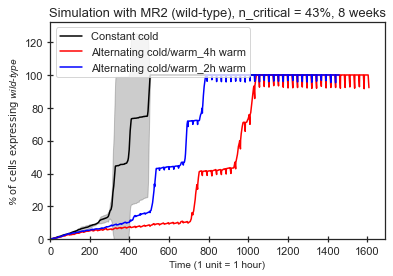

In [5]:
sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ wild-type", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with MR2 (wild-type), n_critical = 43%, 8 weeks", font = "Arial", fontsize = 13)

# ax.plot(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['mean'], 'g', label= 'Continuous cold_4wC')
# ax.fill_between(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['lower'], df_MR0_50_4wC_ens50['upper'], color='g', alpha=0.2)

ax.plot(df_MR2_3_4wC['time'], df_MR2_3_4wC['mean'], 'black', label= 'Constant cold')
ax.fill_between(df_MR2_3_4wC['time'], df_MR2_3_4wC['lower'], df_MR2_3_4wC['upper'], color= 'black', alpha=0.2)

ax.plot(df_MR2_3_4wCW['time'], df_MR2_3_4wCW['mean'], 'red', label= 'Alternating cold/warm_4h warm')

ax.plot(df_MR2_3_4wCW_with2hW['time'], df_MR2_3_4wCW_with2hW['mean'], 'blue', label= 'Alternating cold/warm_2h warm')


ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
fig.savefig("6-4wild.png", dpi = 600)

In [6]:
%%time 

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_3_4wC = hfsp.ensemble(g, temp_sch_8wC, p_decay, p_cold, p_warm, p_edge = 1, 
                          rule_code_node = [0,0.43], rule_code_edge = None, ensemble_size = 3 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_3_4wCW = hfsp.ensemble(g, temp_sch_8wCW, p_decay, p_cold, p_warm, p_edge = 1, 
                          rule_code_node = [0,0.43], rule_code_edge = None, ensemble_size = 3 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


Wall time: 6min 50s


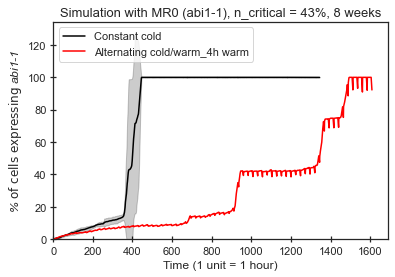

In [7]:


sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ abi1-1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with MR0 (abi1-1), n_critical = 43%, 8 weeks", font = "Arial", fontsize = 13)

# ax.plot(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['mean'], 'g', label= 'Continuous cold_4wC')
# ax.fill_between(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['lower'], df_MR0_50_4wC_ens50['upper'], color='g', alpha=0.2)

ax.plot(df_MR0_3_4wC['time'], df_MR0_3_4wC['mean'], 'black', label= 'Constant cold')
ax.fill_between(df_MR0_3_4wC['time'], df_MR0_3_4wC['lower'], df_MR0_3_4wC['upper'], color= 'black', alpha=0.2)

ax.plot(df_MR0_3_4wCW['time'], df_MR0_3_4wCW['mean'], 'red', label= 'Alternating cold/warm_4h warm')

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
fig.savefig("6-4abi.png", dpi = 600)